In [1]:
import os
import pandas as pd
import boto3
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for all of Pea Island
latmin = 35.604
latmax = 35.775
lonmin = -75.54
lonmax = -75.44

# location of navigation files
parent_dir = 'D:\\crs\\proj\\2020_Pea_Island_SfM'
nav_file = os.path.join('nav_file','2020-0928_ppk-photo-locations-mbase-GP153112.txt')
path = os.path.join(parent_dir,nav_file)

# how many rows to skip at top of nav file?
skiprows = 41

print(path)

D:\crs\proj\2020_Pea_Island_SfM\nav_file\2020-0928_ppk-photo-locations-mbase-GP153112.txt


In [2]:
df = pd.read_csv(path, skiprows=skiprows, header=None, delim_whitespace=True,\
                names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                         'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])

#dfs[hort] will accumulate locations inside bounding box
dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
print("Found {} images.".format(len(dfs)))

# dfa[all] will accumulate all locations
dfa = df.copy()
print("{} images now in dfa".format(len(dfa)))

dfs.describe()

Found 1337 images.
16532 images now in dfa


,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCSeconds
count,1337.000000,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.00000,1337.0,1337.000000,1337.000000,1337.000000
mean,455670.010200,3.949961e+06,409.295444,35.692564,-75.489973,370.44853,1.0,0.027437,0.015076,153781.864377
std,1589.047428,5.613499e+03,194.858240,0.050542,0.017866,194.85869,0.0,0.009340,0.003516,6878.492102
min,451479.982000,3.940130e+06,293.666000,35.604030,-75.536822,254.85200,1.0,0.017000,0.011000,144385.004524
25%,454455.335000,3.945131e+06,306.172000,35.649086,-75.503634,267.31100,1.0,0.020000,0.012000,144740.030236
50%,456041.827000,3.950045e+06,308.509000,35.693339,-75.485861,269.68400,1.0,0.029000,0.018000,151690.005312
75%,457045.698000,3.954900e+06,318.698000,35.737030,-75.474466,279.79700,1.0,0.041000,0.019000,156911.017095
max,457930.706000,3.959107e+06,780.536000,35.774878,-75.464462,741.72800,1.0,0.042000,0.019000,163834.027349


In [3]:
dfs

,image_name,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCDate,UTCTime,UTCSeconds
1094,2020-0928-160624-DSC01285-N7251F.jpg,452275.656,3959107.331,307.771,35.774871,-75.528021,268.857,1,0.042,0.019,9/28/2020,16:06:25.004523,144385.004524
1095,2020-0928-160625-DSC01286-N7251F.jpg,452325.199,3959087.258,308.984,35.774692,-75.527471,270.071,1,0.042,0.019,9/28/2020,16:06:26.005509,144386.005509
1096,2020-0928-160626-DSC01287-N7251F.jpg,452373.778,3959065.970,310.612,35.774502,-75.526933,271.699,1,0.042,0.019,9/28/2020,16:06:27.004552,144387.004552
1097,2020-0928-160627-DSC01288-N7251F.jpg,452421.627,3959043.504,312.399,35.774302,-75.526402,273.486,1,0.042,0.019,9/28/2020,16:06:28.006463,144388.006463
1098,2020-0928-160628-DSC01289-N7251F.jpg,452468.348,3959019.583,314.177,35.774089,-75.525883,275.264,1,0.042,0.019,9/28/2020,16:06:29.008424,144389.008424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15664,2020-0928-213029-DSC05856-N7251F.jpg,452713.138,3958881.260,778.847,35.772853,-75.523167,739.936,1,0.017,0.011,9/28/2020,21:30:30.022610,163830.022610
15665,2020-0928-213030-DSC05857-N7251F.jpg,452687.025,3958937.706,778.814,35.773361,-75.523459,739.903,1,0.017,0.011,9/28/2020,21:30:31.026526,163831.026526
15666,2020-0928-213031-DSC05858-N7251F.jpg,452661.082,3958993.859,778.916,35.773866,-75.523750,740.005,1,0.017,0.011,9/28/2020,21:30:32.025437,163832.025437
15667,2020-0928-213032-DSC05859-N7251F.jpg,452635.111,3959050.212,779.150,35.774373,-75.524040,740.237,1,0.017,0.011,9/28/2020,21:30:33.028050,163833.028050


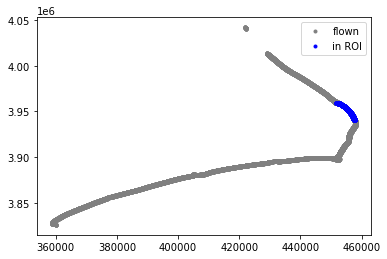

In [4]:
# Make a simple plot
easting = dfa['easting'].values
northing = dfa['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='in ROI')
plt.legend()
plt.show()

In [5]:
session = boto3.session.Session(profile_name='updown')
s3_resource = session.resource('s3')
bucket = s3_resource.Bucket('cmgp-sfm')

s3.Bucket(name='cmgp-sfm')


In [6]:
# location on S3
s3f = '2020-0928-NC/jpg_adobe/'
test_file = r'2020-0928-150641-DSC00182-N7251F.jpg'

#local_dest = 'D:\\crs\\proj\\2020_Pea_Island_SfM\\jpg\\'+test_file
local_dest = '.\\test_file.jpg'
try:
    src_key = s3f+test_file
    print(src_key)
    bucket.download_file(src_key, local_dest)
    print("Copied "+local_dest)
except:
    print("Fail: "+src_key)

2020-0928-NC/jpg_adobe/2020-0928-150641-DSC00182-N7251F.jpg
Copied .\test_file.jpg


In [7]:
icount = 0
for f in dfs['image_name'].values :
    local_dest = 'D:\\crs\\proj\\2020_Pea_Island_SfM\\jpg\\'+f
    try:
        src_key = s3f+f
        bucket.download_file(src_key, local_dest)
        print("Copied "+local_dest)
        icount = icount +1
    except:
        print("Fail: "+src_key)
           
print("Copied {} files.".format(icount))

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160624-DSC01285-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160625-DSC01286-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160626-DSC01287-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160627-DSC01288-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160628-DSC01289-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160629-DSC01290-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160631-DSC01291-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160632-DSC01292-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160633-DSC01293-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160634-DSC01294-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160635-DSC01295-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160636-DSC01296-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160813-DSC01388-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160814-DSC01389-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160815-DSC01390-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160817-DSC01391-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160818-DSC01392-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160819-DSC01393-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160820-DSC01394-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160821-DSC01395-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160822-DSC01396-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160823-DSC01397-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160824-DSC01398-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-160825-DSC01399-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161003-DSC01491-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161004-DSC01492-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161005-DSC01493-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161006-DSC01494-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161007-DSC01495-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161008-DSC01496-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161009-DSC01497-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161010-DSC01498-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161011-DSC01499-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161012-DSC01500-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161013-DSC01501-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161014-DSC01502-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161152-DSC01594-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161153-DSC01595-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161155-DSC01596-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161156-DSC01597-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161157-DSC01598-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161158-DSC01599-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161159-DSC01600-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161200-DSC01601-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161201-DSC01602-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161202-DSC01603-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161203-DSC01604-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-161204-DSC01605-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180317-DSC07279-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180318-DSC07280-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180319-DSC07281-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180320-DSC07282-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180322-DSC07283-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180323-DSC07284-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180324-DSC07285-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180325-DSC07286-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180326-DSC07287-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180327-DSC07288-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180328-DSC07289-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180329-DSC07290-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180514-DSC07382-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180515-DSC07383-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180516-DSC07384-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180517-DSC07385-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180519-DSC07386-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180520-DSC07387-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180521-DSC07388-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180522-DSC07389-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180524-DSC07390-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180525-DSC07391-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180526-DSC07392-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180527-DSC07393-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180712-DSC07485-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180713-DSC07486-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180714-DSC07487-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180715-DSC07488-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180717-DSC07489-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180718-DSC07490-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180719-DSC07491-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180720-DSC07492-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180721-DSC07493-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180722-DSC07494-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180723-DSC07495-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-180724-DSC07496-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-192959-DSC09639-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193000-DSC09640-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193001-DSC09641-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193002-DSC09642-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193003-DSC09643-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193004-DSC09644-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193005-DSC09645-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193007-DSC09646-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193008-DSC09647-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193009-DSC09648-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193010-DSC09649-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193011-DSC09650-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193150-DSC09742-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193151-DSC09743-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193152-DSC09744-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193153-DSC09745-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193154-DSC09746-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193156-DSC09747-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193157-DSC09748-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193158-DSC09749-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193159-DSC09750-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193200-DSC09751-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193201-DSC09752-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193202-DSC09753-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193344-DSC09845-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193345-DSC09846-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193346-DSC09847-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193347-DSC09848-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193349-DSC09849-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193350-DSC09850-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193351-DSC09851-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193352-DSC09852-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193353-DSC09853-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193354-DSC09854-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193355-DSC09855-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193356-DSC09856-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193540-DSC09948-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193541-DSC09949-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193542-DSC09950-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193543-DSC09951-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193544-DSC09952-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193545-DSC09953-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193546-DSC09954-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193548-DSC09955-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193549-DSC09956-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193550-DSC09957-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193551-DSC09958-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-193552-DSC09959-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212650-DSC05657-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212651-DSC05658-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212652-DSC05659-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212653-DSC05660-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212654-DSC05661-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212656-DSC05662-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212657-DSC05663-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212658-DSC05664-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212659-DSC05665-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212700-DSC05666-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212701-DSC05667-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212702-DSC05668-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j

Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212843-DSC05760-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212844-DSC05761-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212845-DSC05762-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212847-DSC05763-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212848-DSC05764-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212849-DSC05765-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212850-DSC05766-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212851-DSC05767-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212852-DSC05768-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212853-DSC05769-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212854-DSC05770-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\jpg\2020-0928-212855-DSC05771-N7251F.jpg
Copied D:\crs\proj\2020_Pea_Island_SfM\j